In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_img_plt(img, c_map ='gray', fig_hight=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)

In [3]:
def show_mult_img(rows, columns, img_names, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

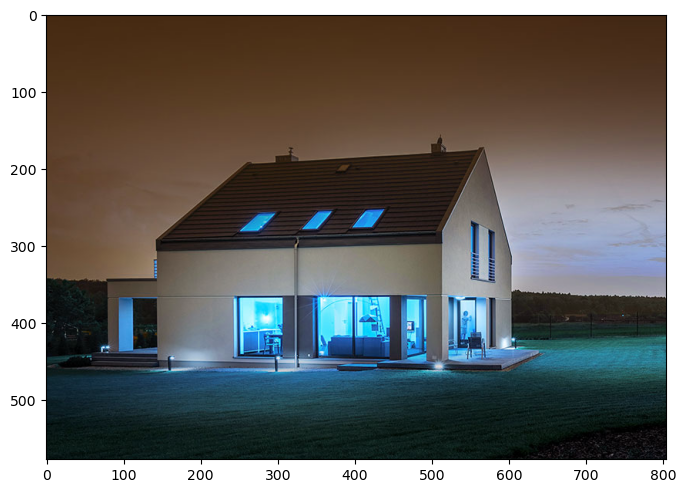

In [4]:
img = cv2.imread('img/0_home.jpg')
show_img_plt(img)

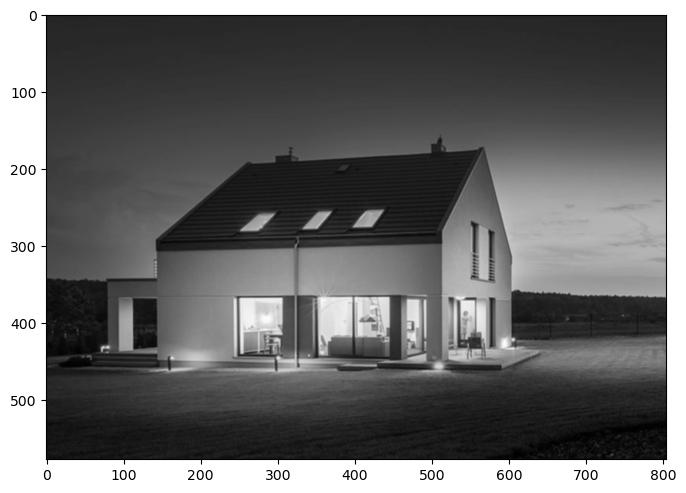

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)
show_img_plt(img_blur)

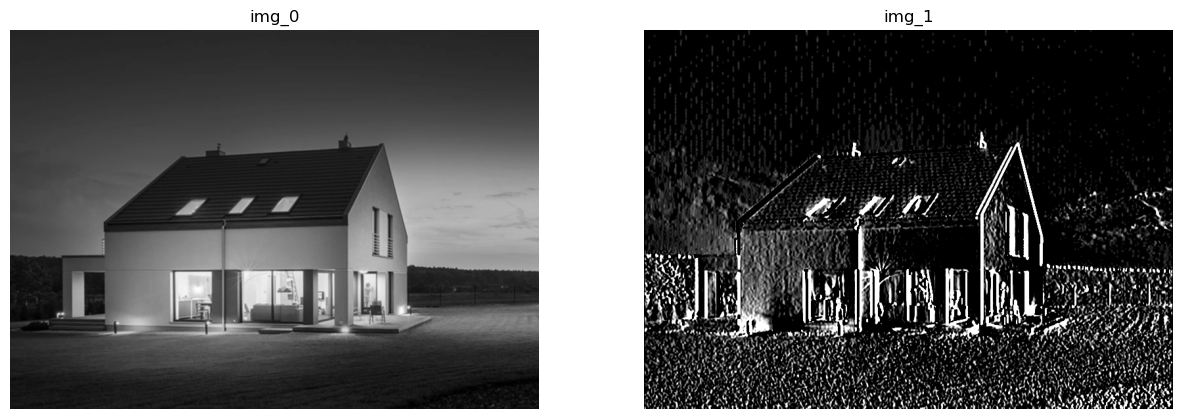

In [6]:
#Gradient
sobelx = cv2.Sobel(src=img_blur, ddepth=-1, dx=1, dy=0, ksize=5)
show_mult_img(1, 2, (img_blur, sobelx))
#show_img_plt(sobelx)

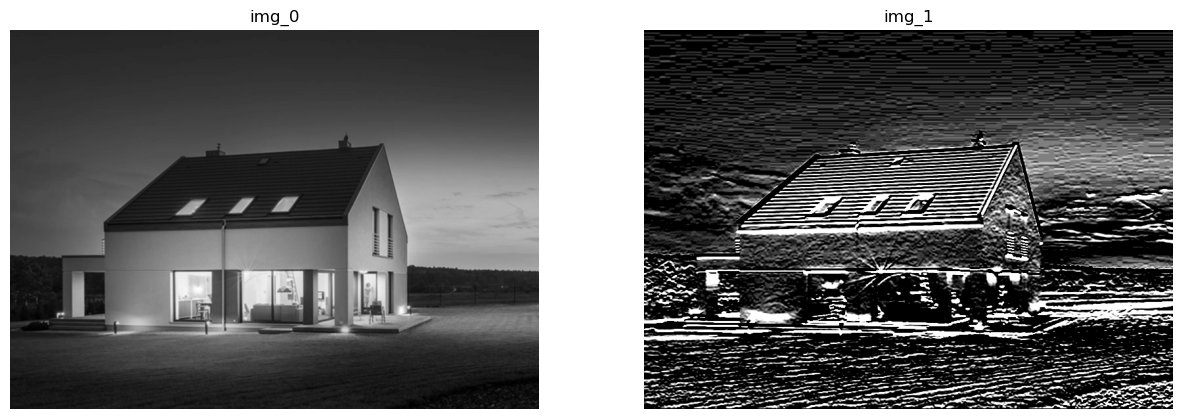

In [7]:
sobely = cv2.Sobel(src=img_blur, ddepth=-1, dx=0, dy=1, ksize=5)
show_mult_img(1, 2, (img_blur, sobely))
#show_img_plt(sobely)

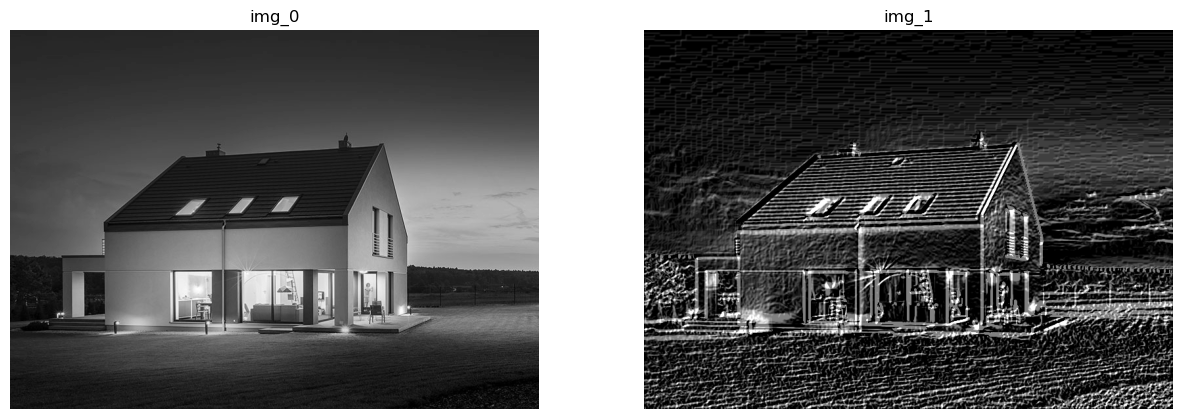

In [8]:
# magnitude = ((sobelx)**2 + (sobely**2))**(1/2)
# magnitude = abs(sobelx) + abs(sobely)

gradient = cv2.addWeighted(np.abs(sobelx), 0.5, np.abs(sobely), 0.5, 0)
show_mult_img(1, 2, (img_gray, gradient))

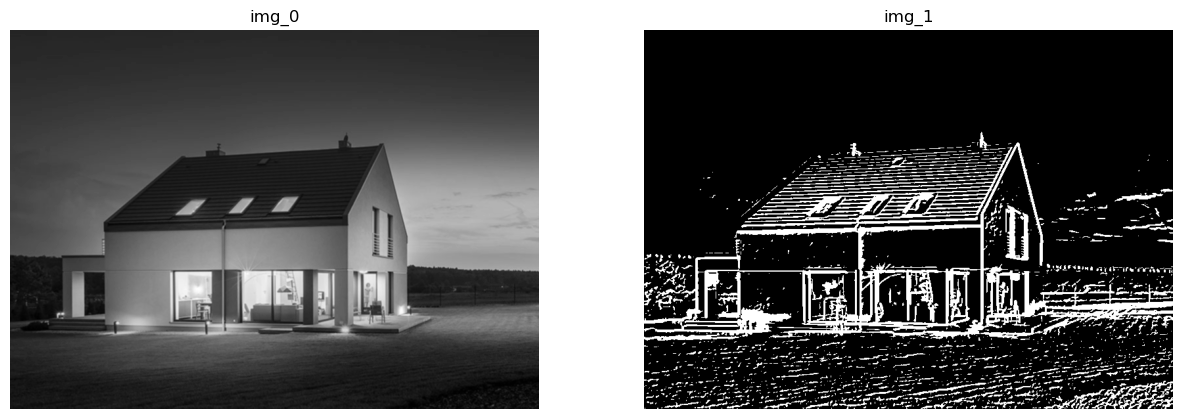

In [9]:
threshold_value = 125
ret, thresh = cv2.threshold(gradient, threshold_value, 255, cv2.THRESH_BINARY)
show_mult_img(1, 2, (img_blur, thresh))

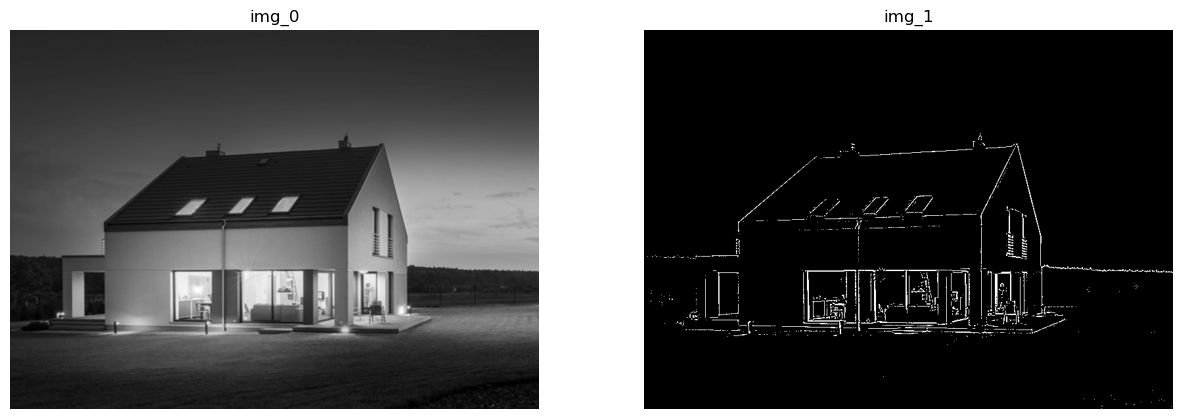

In [10]:
laplacian = cv2.Laplacian(img_blur, -1)
threshold_value = 20
ret, thresh = cv2.threshold(laplacian, threshold_value, 255, cv2.THRESH_BINARY)
show_mult_img(1, 2, (img_blur, thresh))

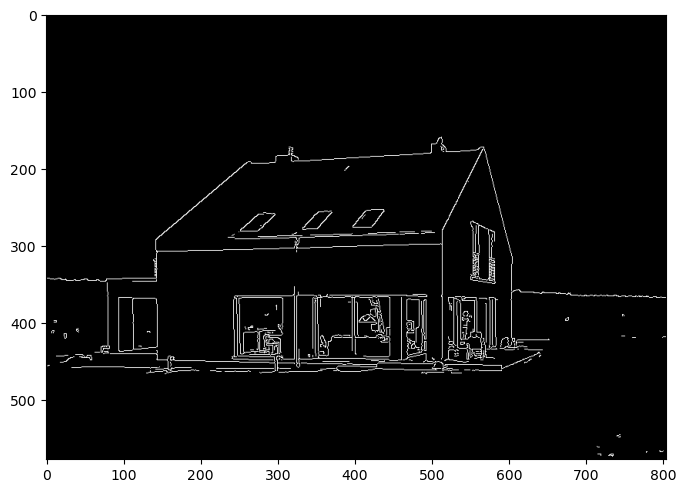

In [11]:
canny = cv2.Canny(image=img_blur, threshold1=120, threshold2=150)
show_img_plt(canny)

In [12]:
vid = cv2.VideoCapture(0)

while(True):
    ret, frame = vid.read()
    
    if not ret:
        print('the frame not found!')
        break
    image_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    image_blur = cv2.GaussianBlur(image_gray, (3, 3), 0)
    
    #clahe = cv2.createCLAHE(clipLimit=100)
   # clahe_img = clahe.apply(image_blur)

    canny = cv2.Canny(image=image_blur, threshold1=100, threshold2=110)

    
    
    
    
    
    
    
    
    
    cv2.imshow('frame', canny)
    
    if cv2.waitKey(1) == ord('q'):
        break

vid.release()        
cv2.destroyAllWindows()

    
